<a href="https://colab.research.google.com/github/jjain0811/Comprehensive-Survey-on-Techniques-of-Topic-Evolution-Mining/blob/main/tweetclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Research Project 20-21/Datasets/Pulwama Original Tweets')

In [ ]:
import numpy as np
x = np.load("embeddings.npy")

In [ ]:
x.shape

(38799, 768)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_red = pca.fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x_reduced = pca.fit_transform(x)

In [ ]:
print(pca.singular_values_)

[19.809778  15.491447  12.893035  11.295303   9.92756    9.497997
  9.0060215  7.9195046  7.256188   7.2359986]


In [ ]:
from sklearn.cluster import KMeans
num_clusters = 15
for i in range(1, num_clusters):
  kmeans = KMeans(n_clusters=i, random_state= 0,max_iter= 300, verbose = 0)
  kmeans.fit(x_reduced)
  print(i, kmeans.inertia_)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state= 0,max_iter= 300, verbose = 0)
kmeans.fit(x_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
clustered_x = kmeans.transform(x_reduced)

In [ ]:
clustered_x.shape

(38799, 5)

In [ ]:
clustered_x[0]

array([0.17955384, 0.12780166, 0.1296681 , 0.22297171, 0.25764424],
      dtype=float32)

In [ ]:
clust = np.argmin(clustered_x, axis= 1)

In [ ]:
dict = {}
for i, cl in enumerate(clust):
  try:
    dict[cl].append(i)
  except:
    dict[cl] = [i]



In [ ]:
len(dict)

5

In [ ]:
import pickle
with open("text.pickle", "rb") as file:
  arr = pickle.load(file)

In [ ]:
text_clust = {}
for i in dict:
  tex = []
  for ii in dict[i]:
    tex.append(arr[ii])
  text_clust[str(i)] = tex
  # try:
  #   text_clust[cl].append(i)
  # except:
  #   text_clust[cl] = [i]

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

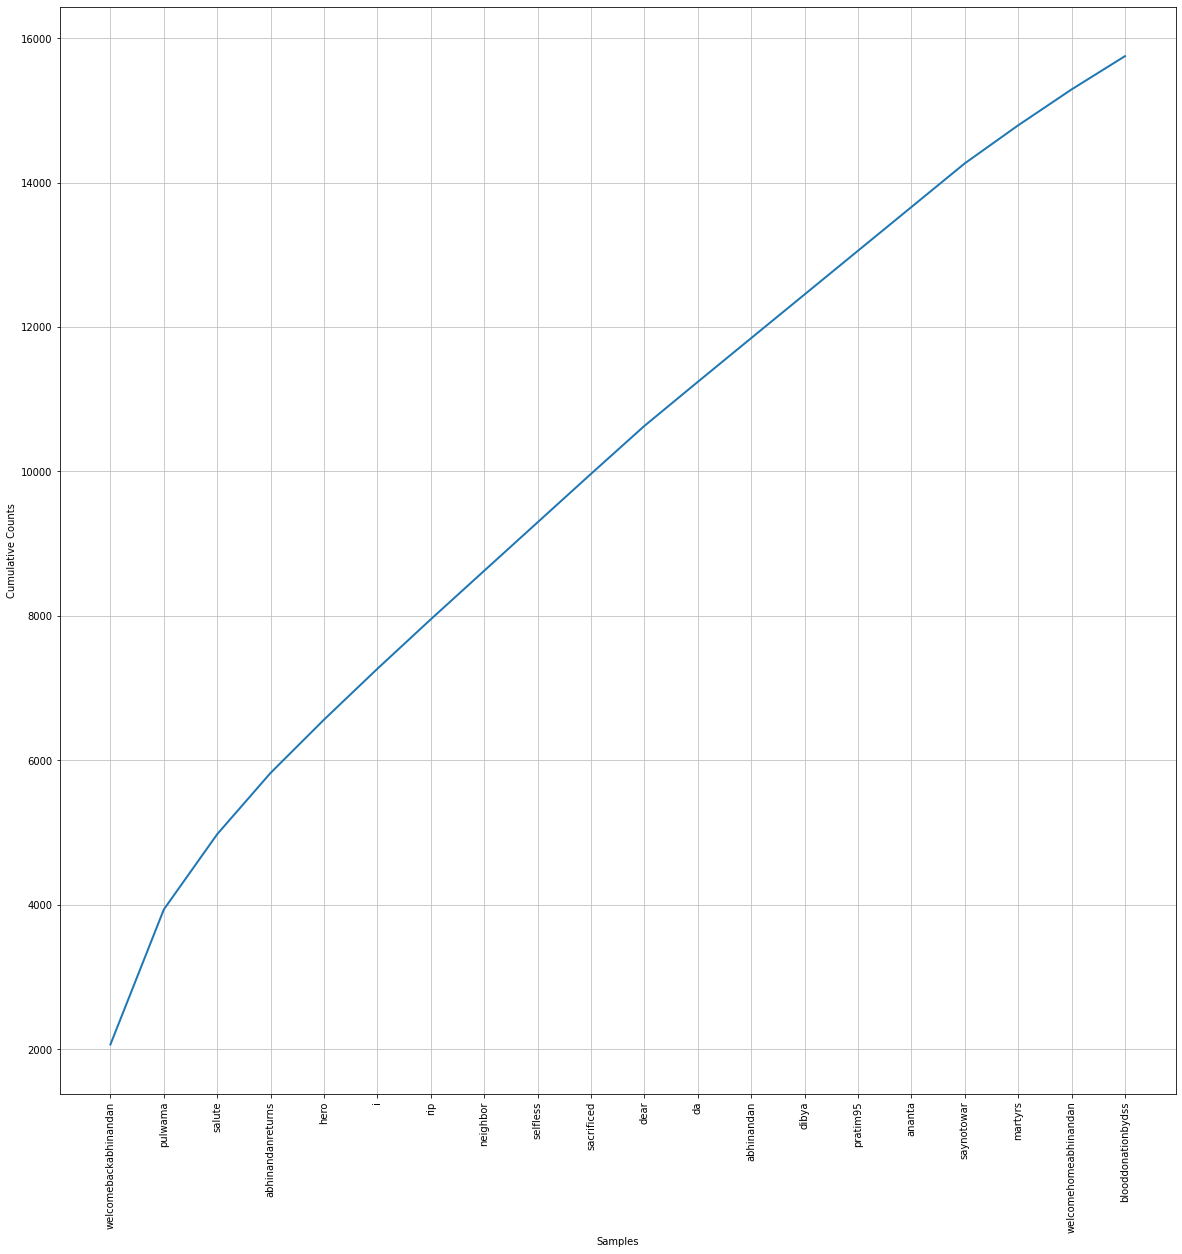

In [ ]:
import nltk
from nltk.corpus import stopwords
import seaborn
import matplotlib.colors as colors
import matplotlib.pyplot as plt
st = stopwords.words("english")
all_words = []
for w in text_clust["4"]:
    for i in w.split():
      if i not in st:
        all_words.append(i.lower())

#Using FrequencyDistribution to check frequency of words in the data
all_words=nltk.FreqDist(all_words)
#Plotting the first 100 most frequent common words
plt.figure(figsize=(20,20))

all_words.plot(20,cumulative=True)

In [ ]:
  text_clust["2"]

['nikhilnani1234 Dear emirates Thankyou for recruiting terrorist pulwama pakistan',
 'pulwama',
 'vikrant489 ReutersIndia Two things A Pakistan based group JeM owned it B It is a TERROR attack',
 'nikhilnani1234 Dear emirates Thankyou for recruiting terrorist pulwama pakistan',
 'nikhilnani1234 Dear emirates Thankyou for recruiting terrorist pulwama pakistan',
 'RIPBraveHearts Pulwama',
 'ArainJutley Sorry to say if you are on their side I am not at yours Pulwama',
 'SYSTEM N INFRA FAILURE V CITIZENS RESPONSIBLE FOR PULWAMA ATTACK FUTURE ATTACK N PAST ATTACKS',
 'imMAK02 Now Pulwama',
 'India scraps Pak s Most Favoured Nation status',
 'Hobble Prime minister Now we don t want to talk We need another Surgical strike',
 'It is not Pakistan who is doing this but is a result of India s own actions and atrocities',
 'strangegarden7 KitBeutler 2 of 2',
 'nikhilnani1234 Dear emirates Thankyou for recruiting terrorist pulwama pakistan',
 'narendramodi Modi Ji I don t want 15 lacs I want to you

In [ ]:
!pip install twython


In [ ]:
# sentence = text_clust["1"][100]
sentence="The govt.is doing great"
print(sentence)

The govt.is doing great


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(sentence)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'compound': 0.6249, 'neg': 0.0, 'neu': 0.423, 'pos': 0.577}

In [ ]:
from textblob import TextBlob
TextBlob(sentence).sentiment


Sentiment(polarity=0.8, subjectivity=0.75)

In [ ]:
!pip3 install flair
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
total_sentiment

2021-01-07 12:27:22,917 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


[POSITIVE (0.9703)]

In [ ]:
import json
with open('clusters.json', 'w') as fp:
    json.dump(text_clust, fp)

In [ ]:
import seaborn
import matplotlib.colors as colors
import matplotlib.pyplot as plt


In [ ]:
pca = PCA(n_components=3)
X_red = pca.fit_transform(x_reduced)

cyan
darkblue
darkcyan
darkgoldenrod
darkgray


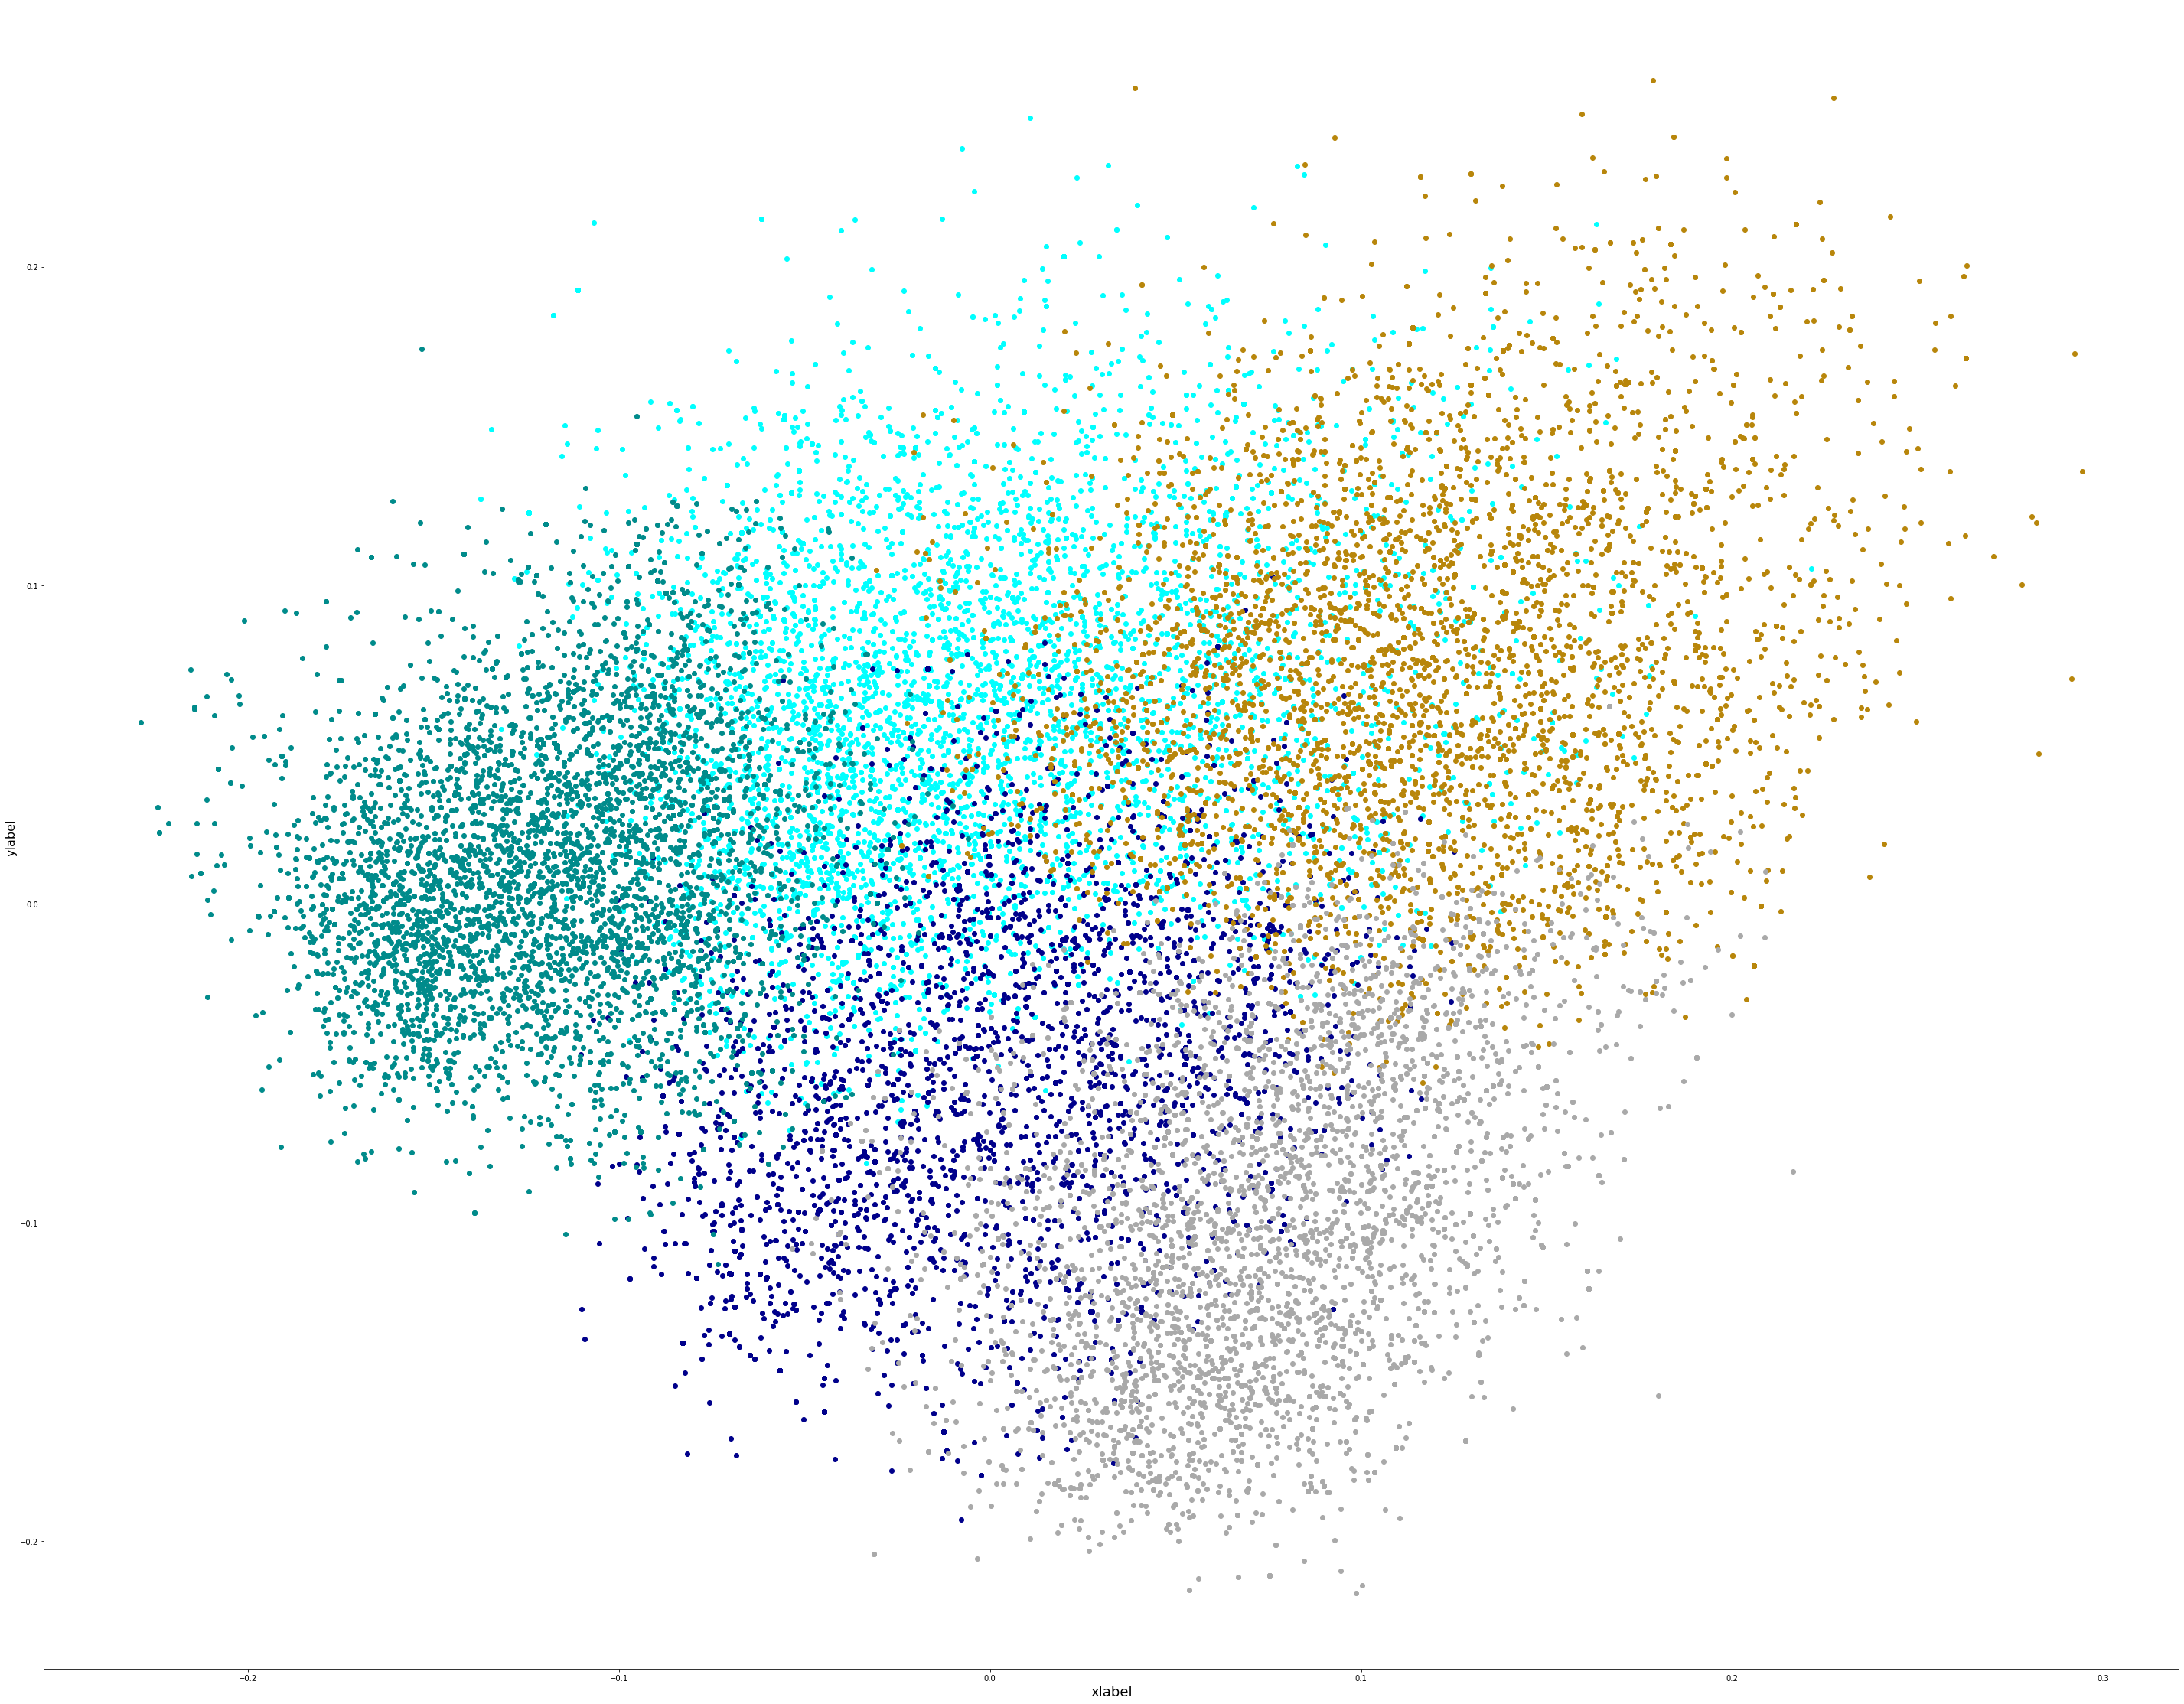

In [ ]:
plt.figure(figsize=(50,40))
cmap = plt.get_cmap('gnuplot')
col = [c for c in colors.cnames]
for i in range(num_clusters):
  print(col[i+20])
  plt.scatter(X_red[(clust == i), 0], X_red[(clust == i), 1], color=col[i+20])
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
plt.show()

In [ ]:
Y_label=[]
for i in clust:
  if i==0:
    Y_label.append("black")

  if i==1:
    Y_label.append("blue")

  if i==2:
    Y_label.append("red")

  if i==3:
    Y_label.append("yellow")

  if i == 4:
    Y_label.append("green")

In [ ]:
dict={"X":X_red[:,0],"Y":X_red[:,1],"Z":X_red[:,2],"Colors":Y_label}

In [ ]:
fil = np.random.choice(500668, 50000, replace = False)


In [ ]:
random_0=[]
random_1=[]
random_2=[]
random_3=[]
for i in range(0,38799):
  random_0.append(X_red[i,0])
  random_1.append(X_red[i,1])
  random_2.append(X_red[i,2])
  random_3.append(clust[i])

In [ ]:
dict={"X":random_0,"Y":random_1,"Z":random_2,"Cluster":random_3}

In [ ]:
import plotly.express as px
fig=px.scatter_3d(dict,x="X",y="Y",z="Z",color="Cluster")
fig.show()

In [ ]:
import numpy as np
tweets = np.load("tweets.npy")

In [ ]:
clust0 = tweets[clust == 0]
clust1 = tweets[clust == 1]
clust2 = tweets[clust == 2]
clust3 = tweets[clust == 3]
clust4 = tweets[clust == 4]

In [ ]:
print("1:", clust0[10: 30])
print("2:", clust1[10: 30])
print("3:", clust2[10: 30])
print("4:", clust3[10: 30])
print("5:", clust4[10: 30])


1: ['@ChelseBuchanan Ssh it’s a defence mechanism 🤕'
 '@Sxma__El Love that the dining table’s behind the bed  (but the baby is drowning in the bath )😰'
 '@ammar_h18 @bloopmooo @shaiasksksk I don’t like seeing you on my tl anymore'
 '@ChelseBuchanan I think you’re onto something here 🤔'
 '@ChelseBuchanan Clinique could never ✋🏽'
 '@ChelseBuchanan Using tears&gt;&gt;&gt;&gt;' '@harveeeeer Innit 🤕'
 '@bloopmooo *there’s no such thing'
 '@bloopmooo @ChelseBuchanan It’s okay, I’m changing my DOB instead so I can stay Libra 👩🏻\u200d🔬'
 '@ChelseBuchanan It’s not settling well with me that I’m no longer a Libra 🙃'
 '@ChelseBuchanan NASA found a new one so all our star signs are different now'
 '@MohammedHaji99 The push I needed 🙏🏽' 'Is it sad to rt my own tweet'
 '@Mvhds_ Pre celebrations for 2nd wave 🙌🏼'
 '@bloopmooo Broke b*tch energy 🤑👏🏼'
 'FOR PALESTINE, FOR YEMEN, FOR THE UGYHUR MUSLIMS STILL IN CHINA’S CONCENTRATION CAMPS. \nHelp in the same ways you’ve been supporting BLM👇🏽👇🏽\n\nhttps:/

In [ ]:
import json
with open("user_list.json", "r") as file:
  sunday = json.load(file)

In [ ]:
sunday.keys()

dict_keys(['4650940896', '361787439', '222092606', '244366115', '188651018', '2163051241', '132175493', '1009681431549767681', '233147987', '124689634', '17777374', '45325119', '1094630456077602816', '703518202085507072', '1058669248766070786', '1960728025', '865622373512302594', '1016631476606160896', '564872307', '22763833', '579746453', '892714904225931265', '893210025786736640', '1075094304052326400', '53138912', '1081056061203726336', '1244850086', '994182136012902400', '1577818483', '1666873268', '3274817563', '995895483389304832', '902787399259889664', '277326209', '2370515628', '1070662883250331648', '1078183395144781824', '280985386', '1003530359978553345', '1092674089511149574', '485210563', '788714977276329984', '823803127245709314', '960788322594385920', '1090919094013083648', '980816129881907200', '854959096818057217', '3188448042', '1075240000516571137', '259847284', '1075746415', '1068105701648752640', '53026001', '709627805634600960', '617916997', '1070251554676994048',

In [ ]:
import tweepy

# assign the values accordingly
consumer_key = "W9u9DlbLpiJlmgtA29v09on0D"
consumer_secret = "MdNR9Fo6zEYRUbwTasuZsvyBnbp9w8PLKczQGJU3grRiddfMvI"
access_token = "1316336744606785537-upD3A5BTOhV4xDY3tXxcKVgCzf154s"
access_token_secret = "8KK6mwOTcDF8AM0zjIlkebfiItEPiqj17d6od353EV2O6"

# authorization of consumer key and consumer secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# set access to user's access key and access secret
auth.set_access_token(access_token, access_token_secret)

# calling the api
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

# using get_user with id
_id = "4650940896"
user = api.get_user(_id)

# printing the name of the user
print("The id " + _id +
      " corresponds to the user with the name : " +
      user.screen_name)

The id 4650940896 corresponds to the user with the name : _paaji


In [ ]:
user.timeline

<bound method User.timeline of User(_api=<tweepy.api.API object at 0x7fcbed2fcd10>, _json={'id': 4650940896, 'id_str': '4650940896', 'name': 'Pinkal Patel', 'screen_name': '_paaji', 'location': 'Gandhinagar, India', 'profile_location': {'id': '64a2dbba3da7cc07', 'url': 'https://api.twitter.com/1.1/geo/id/64a2dbba3da7cc07.json', 'place_type': 'unknown', 'name': 'Gandhinagar, India', 'full_name': 'Gandhinagar, India', 'country_code': '', 'country': '', 'contained_within': [], 'bounding_box': None, 'attributes': {}}, 'description': 'Civil engineer.                                                                  \n\nOfficer of the Government of Gujarat.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 65, 'friends_count': 252, 'listed_count': 0, 'created_at': 'Fri Dec 25 19:47:12 +0000 2015', 'favourites_count': 531, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 200, 'lang': None, 'status': 

In [ ]:
for status in tweepy.Cursor(api.user_timeline, screen_name='', tweet_mode="extended").items():
    print(status.full_text)

In [ ]:
keys =list(sunday.keys())

In [ ]:
len(keys)

64018

In [ ]:
user_tweets = {}
for key in keys[5000:5200]:
  try :
    li = []
    for status in tweepy.Cursor(api.user_timeline, user_id=key, tweet_mode="extended").items():
      try:
        retweeted_status = status.retweete_status
        li.append({"text" : status.full_text,
        "entities" : status.entities,
        "favourite_count" : status.favorite_count,
        "retweet_count" : status.retweet_count,
        "time" : status.created_at,
        "retweeted_status":True})

      except:
        li.append({"text" : status.full_text,
        "entities" : status.entities,
        "favourite_count" : status.favorite_count,
        "retweet_count" : status.retweet_count,
        "time" : status.created_at,
        "retweeted_status":False})
    user_tweets[key] = li
    print("added")
  except Exception as e:
    print(e)
    pass

added
added
Twitter error response: status code = 401


Rate limit reached. Sleeping for: 709


Failed to send request: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))
added
added


Rate limit reached. Sleeping for: 751


Failed to send request: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))
added
Twitter error response: status code = 401
added
Twitter error response: status code = 404
added
Twitter error response: status code = 401
added
added


Rate limit reached. Sleeping for: 757


Failed to send request: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))
added
Twitter error response: status code = 404
added
added


Rate limit reached. Sleeping for: 746


added
Failed to send request: ("Connection broken: ConnectionResetError(104, 'Connection reset by peer')", ConnectionResetError(104, 'Connection reset by peer'))
added
added
added
Twitter error response: status code = 401
added


Rate limit reached. Sleeping for: 755


added
added
Failed to send request: ("Connection broken: ConnectionResetError(104, 'Connection reset by peer')", ConnectionResetError(104, 'Connection reset by peer'))
added


Rate limit reached. Sleeping for: 745


added
added
added


Rate limit reached. Sleeping for: 739


added
added
added
Twitter error response: status code = 401
added


Rate limit reached. Sleeping for: 743


added
added
Twitter error response: status code = 401
added
added
Twitter error response: status code = 404


Rate limit reached. Sleeping for: 758


Failed to send request: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))
Failed to send request: ("Connection broken: ConnectionResetError(104, 'Connection reset by peer')", ConnectionResetError(104, 'Connection reset by peer'))
added
added


Rate limit reached. Sleeping for: 748


Failed to send request: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))
added
added
Twitter error response: status code = 401
added
Twitter error response: status code = 401
Twitter error response: status code = 401
added


Rate limit reached. Sleeping for: 749


added
added
added
added


Rate limit reached. Sleeping for: 740


added
added
Failed to send request: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Rate limit reached. Sleeping for: 739


added
added
Twitter error response: status code = 404
added
Twitter error response: status code = 401
Twitter error response: status code = 401


Rate limit reached. Sleeping for: 743


added
added
added
added


Rate limit reached. Sleeping for: 756


added
added
Twitter error response: status code = 404
Twitter error response: status code = 401
added
Twitter error response: status code = 401
added
Twitter error response: status code = 401


Rate limit reached. Sleeping for: 757


KeyboardInterrupt: ignored

In [ ]:
from bson import json_util
with open("user_5000-5200_.json", "w") as file:
  json.dump(user_tweets, file, default=str)

In [ ]:
len(user_tweets)

54

In [ ]:
print('done')

done
